In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

In [2]:
file = 'df_reduced.csv'
reduced = pd.read_csv(file)

In [3]:
reduced = pd.DataFrame(reduced)

In [4]:
reduced['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN     3328
MANHATTAN    2771
BRONX        2473
QUEENS       2079
STATEN IS     546
(null)        410
PBBX            5
PBMN            3
PBBN            3
208760          2
155070          1
208169          1
190241          1
237177          1
PBBS            1
986759          1
PBMS            1
210334          1
PBSI            1
Name: STOP_LOCATION_BORO_NAME, dtype: int64

In [5]:
searchfor = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN IS', '(null)']
reduced_location = reduced[reduced['STOP_LOCATION_BORO_NAME'].str.contains('|'.join(searchfor))]

C:\Users\cobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [6]:
reduced_location['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN     3328
MANHATTAN    2771
BRONX        2473
QUEENS       2079
STATEN IS     546
(null)        410
Name: STOP_LOCATION_BORO_NAME, dtype: int64

In [7]:
crimes = reduced_location.groupby('SUSPECTED_CRIME_DESCRIPTION')
year_crime = crimes['SUSPECTED_CRIME_DESCRIPTION'].count()

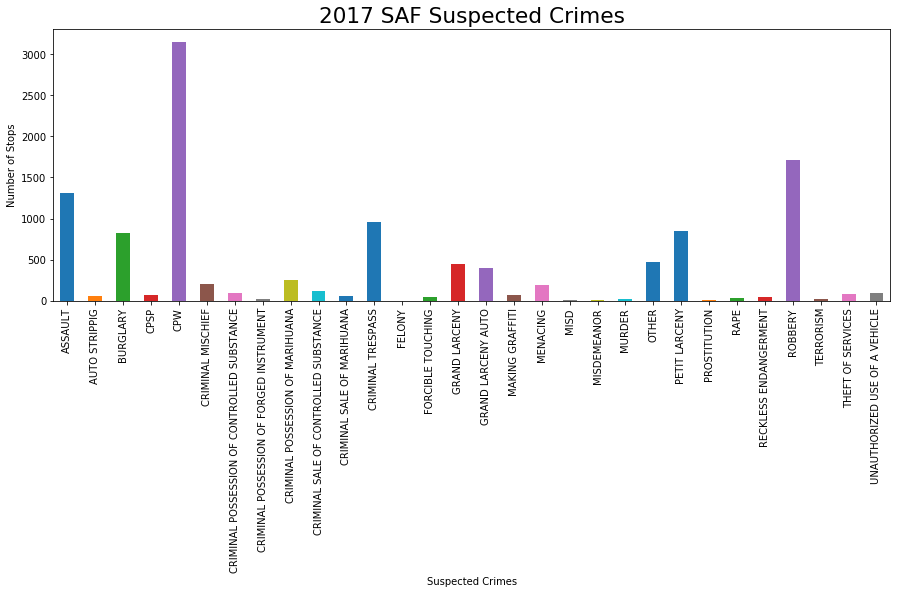

In [8]:
year = year_crime.plot(kind='bar', figsize=(15,5))
plt.rcParams.update({'font.size':18})
plt.title("2017 SAF Suspected Crimes")
plt.xlabel("Suspected Crimes")
plt.ylabel("Number of Stops")
plt.savefig("Suspected Crime.png", bbox_inches='tight', dpi=600)
plt.show()

In [9]:
reduced_location['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

CPW                                            3151
ROBBERY                                        1708
ASSAULT                                        1307
CRIMINAL TRESPASS                               956
PETIT LARCENY                                   852
BURGLARY                                        827
OTHER                                           470
GRAND LARCENY                                   445
GRAND LARCENY AUTO                              402
CRIMINAL POSSESSION OF MARIHUANA                254
CRIMINAL MISCHIEF                               202
MENACING                                        191
CRIMINAL SALE OF CONTROLLED SUBSTANCE           120
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE      99
UNAUTHORIZED USE OF A VEHICLE                    92
THEFT OF SERVICES                                85
CPSP                                             68
MAKING GRAFFITI                                  63
AUTO STRIPPIG                                    61
CRIMINAL SAL

In [10]:
searchfor_crime = ['CPW', 'ASSAULT', 'ROBBERY', 'CRIMINAL TRESPASS', 'PETIT LARCENY']
location_crime = reduced_location[reduced_location['SUSPECTED_CRIME_DESCRIPTION'].str.contains('|'.join(searchfor_crime))]

In [11]:
location_crime['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

CPW                  3151
ROBBERY              1708
ASSAULT              1307
CRIMINAL TRESPASS     956
PETIT LARCENY         852
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [12]:
cpw_df = location_crime.loc[location_crime["SUSPECTED_CRIME_DESCRIPTION"] == "CPW", :]
robbery_df =location_crime.loc[location_crime["SUSPECTED_CRIME_DESCRIPTION"] == "ROBBERY", :]
assault_df = location_crime.loc[location_crime["SUSPECTED_CRIME_DESCRIPTION"] == "ASSAULT", :]
criminal_trespass_df = location_crime.loc[location_crime["SUSPECTED_CRIME_DESCRIPTION"] == "CRIMINAL TRESPASS", :]
petit_df = location_crime.loc[location_crime["SUSPECTED_CRIME_DESCRIPTION"] == "PETIT LARCENY", :]

In [13]:
cpw = pd.DataFrame(cpw_df["STOP_LOCATION_BORO_NAME"].value_counts())
cpw.columns = ["Boro"]
robbery = pd.DataFrame(robbery_df["STOP_LOCATION_BORO_NAME"].value_counts())
robbery.columns = ["Boro"]
assault = pd.DataFrame(assault_df["STOP_LOCATION_BORO_NAME"].value_counts())
assault.columns = ["Boro"]
criminal_trespass = pd.DataFrame(criminal_trespass_df["STOP_LOCATION_BORO_NAME"].value_counts())
criminal_trespass.columns = ["Boro"]
petit = pd.DataFrame(petit_df["STOP_LOCATION_BORO_NAME"].value_counts())
petit.columns = ["Boro"]

In [14]:
suspected_df = pd.concat([cpw, robbery, assault, criminal_trespass, petit], axis=1)
suspected_df.columns = ['CPW', 'Robbery', 'Assault', 'Criminal Trespass', 'Petty Larceny']

C:\Users\cobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
suspected_df

,CPW,Robbery,Assault,Criminal Trespass,Petty Larceny
(null),142,55,48,25,12
BRONX,892,421,268,114,115
BROOKLYN,800,483,376,251,266
MANHATTAN,651,344,335,442,231
QUEENS,541,327,227,100,143
STATEN IS,125,78,53,24,85


In [16]:
new_index= ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN IS", "(null)"]
suspected_df = suspected_df.reindex(new_index)

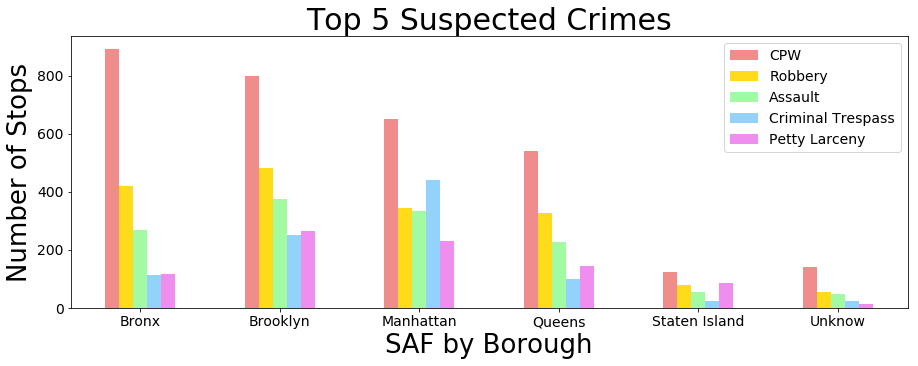

In [42]:
plt.rcParams.update({'font.size':18})
suspected_df.plot(kind="bar", color=["lightcoral", "gold", "palegreen", "lightskyblue", "violet"], alpha=0.9, rot=0, figsize=(15,5))
plt.title("Top 5 Suspected Crimes")
plt.xlabel("SAF by Borough")
plt.ylabel("Number of Stops")
SMALL_SIZE = 14
MEDIUM_SIZE = 36
BIGGER_SIZE = 0
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=26)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
names = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island", "Unknow"]
x_axis = np.arange(len(names))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names)
plt.savefig("Suspected Crime vs Boro.png", bbox_inches='tight', dpi=600)
plt.show()

In [18]:
#df["Column Name"].replace("thing you want to replace", np.nan, inplace=True)
